# tensor intro

In [ ]:
import torch 
import numpy as np

In [ ]:
# creating tensor
#1. directly from the data 
a = [[1,2,3],[3,4,5]]
a_tensor = torch.tensor(a)

In [ ]:
#2. From a numpy array
np_array = np.array(a)
a_np = torch.from_numpy(np_array)

In [ ]:
#3 from another tensor
a_ones = torch.ones_like(a_tensor) # this retains the properties of a
print("this is a ones tensor",a_ones)
a_rand = torch.rand_like(a_tensor,dtype = torch.float)# overides the initail int datatype
print("this is a random tensor",a_rand)

this is a ones tensor tensor([[1, 1, 1],
        [1, 1, 1]])
this is a random tensor tensor([[0.7649, 0.3820, 0.8107],
        [0.6353, 0.9511, 0.3196]])


In [ ]:
shape = (2,3,4)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[[0.4659, 0.3526, 0.2570, 0.5158],
         [0.2458, 0.8133, 0.1595, 0.5600],
         [0.3577, 0.5411, 0.1838, 0.8380]],

        [[0.7755, 0.1488, 0.2098, 0.1868],
         [0.4174, 0.7444, 0.4500, 0.9876],
         [0.4256, 0.6154, 0.9582, 0.7788]]]) 

Ones Tensor: 
 tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]]) 

Zeros Tensor: 
 tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])


In [ ]:
# attributes of tensor
tensor = torch.rand(2,3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([2, 3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [ ]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
  tensor = tensor.to('cuda')
else:
  print("gpu not available")

gpu not available


In [ ]:
# performing operation on tensor similiar ot list
tensor = torch.ones(4, 4)
tensor[:,2:-1] = 0
print(tensor)

tensor([[1., 1., 0., 1.],
        [1., 1., 0., 1.],
        [1., 1., 0., 1.],
        [1., 1., 0., 1.]])


In [ ]:
# performing concatination
tensor1 = torch.ones(4,4)
t1 = torch.cat([tensor, tensor, tensor1], dim=0)
print(t1)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [ ]:
# This computes the element-wise product
print(f"tensor.mul(tensor) \n {tensor.mul(tensor1)} \n")
# Alternative syntax:
print(f"tensor * tensor \n {tensor * tensor1}")

tensor.mul(tensor) 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor * tensor 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [ ]:
# this preforms matrix wise multiplication
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor1.T)} \n")
# Alternative syntax:
print(f"tensor @ tensor.T \n {tensor @ tensor1.T}")

tensor.matmul(tensor.T) 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 

tensor @ tensor.T 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


In [ ]:
# in place operators where _ suffix wil change a
print(tensor, "\n")
tensor.add_(5)
print(tensor)
# there use is discoraged because of immediate loss of history

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


In [ ]:
# tensor on cpu and numpy can share memory location
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [ ]:
# but a change in tensor will reflect a change in numpys
t.add_(4)
print(t)
print(n)

tensor([5., 5., 5., 5., 5.])
[5. 5. 5. 5. 5.]


In [ ]:
# similiarly numpy array can be converted to tensor
b = np.ones((4,4))
t = torch.from_numpy(b)
# but changes in array will also affect changes in tensor and vice versa

In [ ]:
np.add(b,1,out = b)

array([[2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.]])

In [ ]:
print(b)
print(t)

[[2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]]
tensor([[2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]], dtype=torch.float64)


In [ ]:
t.add_(23)

tensor([[25., 25., 25., 25.],
        [25., 25., 25., 25.],
        [25., 25., 25., 25.],
        [25., 25., 25., 25.]], dtype=torch.float64)

In [ ]:
print(b)
print(t)

[[25. 25. 25. 25.]
 [25. 25. 25. 25.]
 [25. 25. 25. 25.]
 [25. 25. 25. 25.]]
tensor([[25., 25., 25., 25.],
        [25., 25., 25., 25.],
        [25., 25., 25., 25.],
        [25., 25., 25., 25.]], dtype=torch.float64)


# dataset and dataloaders


In [1]:
# loading dataset
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw

Processing...


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


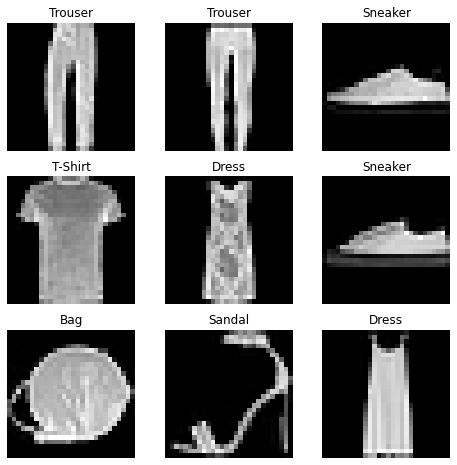

In [3]:
# iterating and visualizing the dataset
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [6]:
# creating a custom dataset
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        sample = {"image": image, "label": label}
        return sample

In [7]:
# preparing loading of data through dataloaders
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


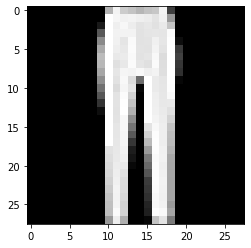

Label: 1


In [8]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# transformers

transformers are used to modify the features <br>
target_transformers are used to modify the labels <br>
search for torchvision.transforms for more info

In [22]:
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
from torchvision import transforms

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

To tensor converts pil image or nd.array to float tensor<br> and lambda function performs user defined function <br> here we convert the numbers into one hot encoding


In [13]:
train_dataload = DataLoader(ds, batch_size=128, shuffle=True)

In [14]:
train_features, train_labels = next(iter(train_dataload))

In [17]:
print(train_labels[2])

tensor([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])


In [25]:
# performing new transformations to images
change  = transforms.RandomApply(torch.nn.ModuleList([
     transforms.ColorJitter(),
]), p=0.7)